In [1]:
import numpy as np 
from parameters import *
from functions import *
import pickle
import matplotlib.pyplot as plt

In [2]:
Qmax = 1.5
Qdim = 500
qlist  = np.linspace(Qmax/Qdim, Qmax, Qdim)
dlist = [10]
d_cv_list = [0.01, 0.05, 0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
EWs_list = []
EVs_list = []
abs_1s_list = []
abs_2s_list = []

In [3]:
for d in dlist:
    with open(r"results/wellwidths/Qmax={}_Qdim={}_d={}_exciton_EWs.pickle".format(Qmax, Qdim,float(d)), 'rb') as output_file:
        EWs_list.append(pickle.load(output_file))
    with open(r"results/wellwidths/Qmax={}_Qdim={}_d={}_exciton_EVs.pickle".format(Qmax, Qdim,float(d)), 'rb') as output_file:
        EVs_list.append(pickle.load(output_file))
    #with open(r"results/wellwidths/Qmax={}_Qdim={}_d={}_exciton_absorption_1s.pickle".format(Qmax, Qdim,d), 'rb') as output_file:
     #   abs_1s_list.append(pickle.load(output_file))
    #with open(r"results/wellwidths/Qmax={}_Qdim={}_d={}_exciton_absorption_2s.pickle".format(Qmax, Qdim,d), 'rb') as output_file:
    #    abs_2s_list.append(pickle.load(output_file))

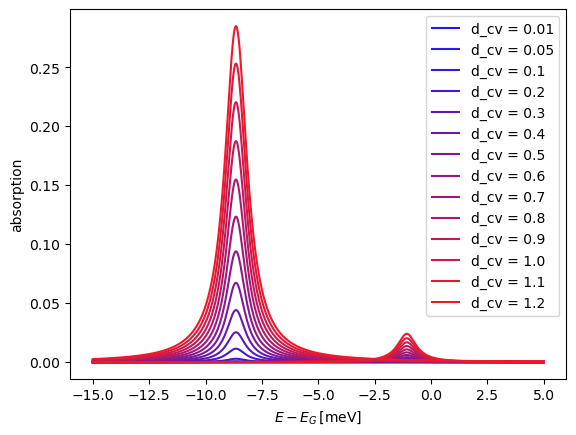

In [4]:
energyresolution = 1000
E_start = -0.015 #+ 0.012903883497007542 * hbar
E_stop = 0.005  #+ 0.012903883497007542 * hbar
omega_list = np.linspace(E_start/hbar,E_stop/hbar,energyresolution)
from matplotlib.colors import to_rgb
import colorsys
import matplotlib as mpl
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

# Funktion zum Reduzieren der Sättigung
def desaturate_color(color, factor=0.9):
    # Konvertiere die Farbe in den RGB-Farbraum
    r, g, b = to_rgb(color)
    # Konvertiere die Farbe in den HSV-Farbraum
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    # Reduziere die Sättigung
    s *= factor
    # Konvertiere die Farbe zurück in den RGB-Farbraum
    desaturated_color = colorsys.hsv_to_rgb(h, s, v)
    return desaturated_color

lowred = desaturate_color('red')
lowblue = desaturate_color('blue')
absorption_1s_list = []
absorption_2s_list = []
abs_1s_list = []
abs_2s_list = []
for i, d_cv in enumerate(d_cv_list):
    
    E_R_0 = E_R_mu(EWs_list[0],EVs_list[0], 0, omega_0, n_ref, omega_list, d_cv, gamma, qlist)
    abs_1s = get_absorption(E_R_0, energyresolution)
    absorption_1s_list.append(abs_1s)
    abs_1s_list.append(max(abs_1s))

    E_R_1 = E_R_mu(EWs_list[0],EVs_list[0], 1, omega_0, n_ref, omega_list, d_cv, gamma, qlist)
    abs_2s = get_absorption(E_R_1, energyresolution)
    absorption_2s_list.append(abs_2s)
    abs_2s_list.append(max(abs_2s))
    
    plt.plot(omega_list*hbar*1000, abs_1s,color = colorFader(lowblue,lowred,i/len(d_cv_list)), label = 'd_cv = {}'.format(d_cv))

    plt.plot(hbar*omega_list*1000,abs_2s,color = colorFader(lowblue,lowred,i/len(d_cv_list)))

plt.xlabel(r"$E-E_G\,$[meV]")
plt.ylabel('absorption')
plt.legend()
#plt.savefig('alpha_comparison_excitons.pdf',bbox_inches = 'tight')
plt.show()


/tmp/ipykernel_228328/1057774801.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()  # Adjust layout to prevent overlap


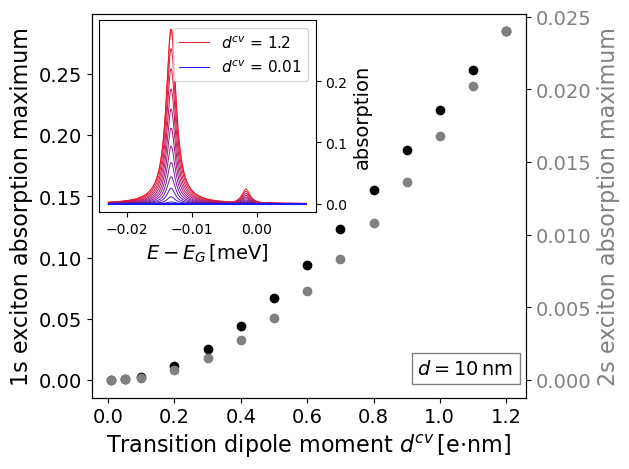

In [11]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
lowred = desaturate_color('red',factor = 0.9)
lowblue = desaturate_color('blue', factor = 0.9)
# Assuming dlist, omega_list, E_1s_list, hbar, and abs_1s_list are defined
fig, ax1 = plt.subplots()

# Plot E_1s on the primary y-axis
for i in range(len(d_cv_list)):
    if i == 0:
        ax1.scatter(d_cv_list[i],abs_1s_list[i], color='black', label=r"$E_{1s}$")
    else:
        ax1.scatter(d_cv_list[i],abs_1s_list[i], color='black')

ax1.set_xlabel(r"Transition dipole moment $d^{cv}\,$[e$\cdot$nm]", fontsize = 16)
ax1.set_ylabel(r"1s exciton absorption maximum", color='black', fontsize = 16)
ax1.tick_params(axis='y', labelcolor='black', labelsize = 14)
ax1.tick_params(axis='x', labelsize = 14)
# Create a secondary y-axis for max(alpha_1s)
ax2 = ax1.twinx()
for i in range(len(d_cv_list)):
    if i == 0:
        ax2.scatter(d_cv_list[i], abs_2s_list[i], color='grey', label=r"max($\alpha_{1s}$)")
    else:
        ax2.scatter(d_cv_list[i], abs_2s_list[i], color='grey')

ax2.set_ylabel(r"2s exciton absorption maximum", color='grey', fontsize = 16)
ax2.tick_params(axis='y', labelcolor='grey', labelsize = 14)
ax2.tick_params(axis='x', labelsize = 14)

ax1_inset = inset_axes(ax1, width="50%", height="50%", loc='upper left')
for i in reversed(range(len(d_cv_list))):
    if i == 0:
        ax1_inset.plot(omega_list, absorption_1s_list[i], linewidth = 0.7, color = colorFader(lowblue,lowred,i/len(d_cv_list)), label = r"$d^{cv}$ = 0.01")
    elif i ==  len(d_cv_list)-1:   
        ax1_inset.plot(omega_list, absorption_1s_list[i], linewidth = 0.7, color = colorFader(lowblue,lowred,i/len(d_cv_list)), label = r"$d^{cv}$ = 1.2")
    ax1_inset.plot(omega_list, absorption_1s_list[i], linewidth = 0.7, color = colorFader(lowblue,lowred,i/len(d_cv_list)))
    ax1_inset.plot(omega_list, absorption_2s_list[i], linewidth = 0.7, color = colorFader(lowblue,lowred,i/len(d_cv_list)))
ax1_inset.yaxis.set_label_position("right")
ax1_inset.yaxis.tick_right()
ax1_inset.legend(fontsize = 11)

plt.xlabel(r"$E-E_G\,$[meV]", fontsize = 14)
plt.ylabel(r'absorption' , fontsize = 14)
textstr = r"$d = 10\,$nm "
props = dict(facecolor='white', alpha=0.5)
ax2.text(0.75, 0.1, textstr, transform=ax2.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
# Add legends for clarity
fig.tight_layout()  # Adjust layout to prevent overlap
#fig.legend(bbox_to_anchor=(0.9, 0.9))
#plt.savefig('1s_dependence_d_cv.pdf',bbox_inches = 'tight')
plt.show()

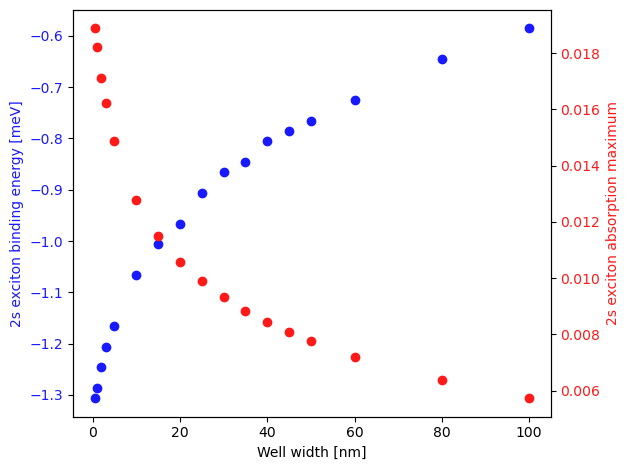

[0.06724402934774998, 0.09392988701527538, 0.1234063395461531, 0.15485650780296956, 0.18747169033985567, 0.2204839543873306]
